In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import spatial
import tensorflow as tf
from tensorflow.keras import layers,Sequential,regularizers

In [2]:
train=pd.read_csv("./input/train.csv")
test=pd.read_csv("./input/test.csv")
validation=pd.read_csv("./input/validation.csv")

In [3]:
def split_X_and_y(df,target):
    X=df.drop(columns=[target,"track","artist"])
    y=df[target]
    return X,y

In [4]:
X_train,y_train=split_X_and_y(train,"Song_Label")
X_test,y_test=split_X_and_y(test,"Song_Label")
X_val,y_val=split_X_and_y(validation,"Song_Label")

In [5]:
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade
0,0.444581,-0.972723,1.638753,-0.793410,-1.503759,-0.463111,0.706359,0.194586,-0.552604,0.479628,0.111471,-0.762637,0.25102,1.968211,-1.120657,-1.296824
1,-0.479098,0.407024,1.072897,0.607076,0.665000,-0.370427,-1.073213,-0.507625,-0.228077,-0.972474,2.015245,0.299271,0.25102,0.054423,0.109963,0.416659
2,0.923317,0.744031,0.224112,0.849950,0.665000,-0.384330,-0.922656,-0.506242,0.925155,1.295500,0.023826,-0.627560,0.25102,-0.864662,-0.505347,1.558982
3,-1.194386,-0.397828,-0.341745,-0.588437,0.665000,-0.482806,-1.022772,1.741131,0.386207,-1.818660,0.008743,2.851622,0.25102,-0.165179,2.366100,0.987821
4,0.529064,0.248432,1.072897,-0.402888,-1.503759,0.440558,1.167066,-0.199139,-0.309209,-0.542083,-0.708088,1.195979,0.25102,0.036170,0.315066,0.987821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29042,-0.467833,-0.401793,-1.473458,0.746616,0.665000,-0.553478,1.205459,-0.323456,2.263830,0.045495,-1.392829,-0.385169,0.25102,-0.407760,0.109963,-0.725663
29043,0.112282,0.157242,-0.341745,1.358138,0.665000,-0.376220,0.059596,-0.507785,0.264509,0.067950,-1.424472,-0.103162,0.25102,-0.739306,-0.300244,1.558982
29044,0.382627,1.465623,-0.341745,0.780746,-1.503759,0.003784,-1.076412,2.130240,-0.257053,-0.149117,0.709564,0.815857,0.25102,0.126801,0.315066,1.558982
29045,-0.608638,0.113630,-1.473458,0.036473,0.665000,0.103420,-1.059451,-0.458655,-0.858587,0.412262,0.645865,0.084786,0.25102,-0.166743,-0.095140,-0.725663


In [6]:
model=Sequential()
model.add(layers.Dense(90,input_shape=(X_train.shape[1],),activation="relu"))
model.add(layers.Dense(45,activation="relu"))
# model.add(layers.Dense(45,activation="relu"))
# model.add(layers.Dense(45,activation="relu"))
# model.add(layers.Dense(45,activation="relu"))
model.add(layers.Dense(9,activation="softmax"))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [7]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)

Epoch 1/20
908/908 [==============================] - 5s 2ms/step - loss: 0.3284 - accuracy: 0.9049 - val_loss: 0.1345 - val_accuracy: 0.9488
Epoch 2/20
908/908 [==============================] - 2s 2ms/step - loss: 0.1047 - accuracy: 0.9624 - val_loss: 0.0990 - val_accuracy: 0.9620
Epoch 3/20
908/908 [==============================] - 2s 2ms/step - loss: 0.0828 - accuracy: 0.9696 - val_loss: 0.0870 - val_accuracy: 0.9678
Epoch 4/20
908/908 [==============================] - 2s 2ms/step - loss: 0.0722 - accuracy: 0.9731 - val_loss: 0.0706 - val_accuracy: 0.9740
Epoch 5/20
908/908 [==============================] - 2s 2ms/step - loss: 0.0635 - accuracy: 0.9759 - val_loss: 0.0700 - val_accuracy: 0.9734
Epoch 6/20
908/908 [==============================] - 2s 2ms/step - loss: 0.0571 - accuracy: 0.9786 - val_loss: 0.0681 - val_accuracy: 0.9734
Epoch 7/20
908/908 [==============================] - 2s 2ms/step - loss: 0.0531 - accuracy: 0.9802 - val_loss: 0.0766 - val_accuracy: 0.9676
Epoch 

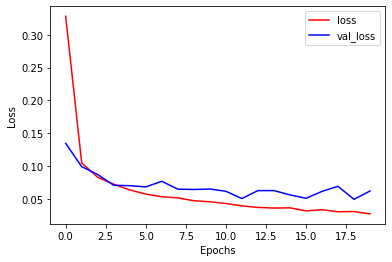

In [8]:
plt.plot(history.history["loss"],color="red")
plt.plot(history.history["val_loss"],color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["loss","val_loss"])

In [9]:
def getCosineSimilarity(v1,v2):
  """
  Get cosine similarity of two numpy arrays

  Args:
      v1 (numpy array): Vector 1
      v2 (numpy array): Vector 2

  Returns:
      float: Cosine similarity value
  """
  cosine_similarity=1-spatial.distance.cosine(v1,v2)
  return round(float(cosine_similarity),3)

In [10]:
df=pd.read_csv("../data/scaled_music_metadata.csv",index_col=0)

In [11]:
def recommendSongs(trackName,numberOfSongs,df=df):
    songData=df[df.track==trackName.lower()].values.tolist()
    featureVector=np.array([songData[0][:-3]])
    songGenre=np.argmax(model.predict(featureVector)[0])
    print(songGenre)
    similarSongs=df[df.Song_Label==songGenre]
    similarSongs['similarity']=df.drop(columns=["track","artist","Song_Label"]).apply(lambda v2:getCosineSimilarity(featureVector,v2),axis=1)
    return similarSongs.sort_values(by="similarity",ascending=False).iloc[:numberOfSongs+1,:][["track","artist","similarity"]]
    

In [12]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,track,artist,Song_Label
0,0.213662,-0.429547,-0.341745,0.555409,0.665000,-0.510612,0.009391,-0.507789,-0.245462,-0.040584,0.471364,-0.317757,0.25102,-0.485791,0.520170,0.987821,lucky man,montgomery gentry,8
1,0.923317,1.088968,1.355825,0.893509,-1.503759,1.274713,-1.022772,-0.507789,-0.309209,0.543251,-0.905436,0.067650,0.25102,0.073128,-0.095140,0.987821,on the hotline,pretty ricky,2
2,-2.129329,1.017601,1.072897,1.358892,0.665000,-0.297439,-1.077079,-0.492719,-0.158535,-0.908851,-1.112405,0.876650,0.25102,1.325398,0.520170,0.987821,clouds of dementia,candlemass,0
3,-1.982892,1.644038,-0.341745,1.220107,0.665000,1.077760,-1.077385,-0.249262,-0.054223,-0.785347,0.999746,0.177526,0.25102,0.971366,-0.300244,0.987821,"heavy metal, raise hell!",zwartketterij,0
4,0.506535,0.732137,-0.907601,1.105458,0.665000,-0.526831,-0.005376,-0.507789,-0.442497,0.329927,-0.248868,-0.342512,0.25102,-0.919907,-0.095140,0.987821,i got a feelin',billy currington,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39998,-0.811397,0.855045,1.072897,0.781689,-1.503759,1.865573,-1.074666,-0.507099,-0.112174,0.820198,1.154457,-1.280432,0.25102,-0.514157,-0.915554,0.416659,your secret love,luther vandross,2
39999,0.455846,0.299975,1.072897,0.741901,-1.503759,-0.487441,-0.927972,-0.487146,-0.623884,0.550736,0.509364,-0.192206,0.25102,-0.274722,-0.095140,0.416659,you don't know how it feels,tom petty,2
40000,0.123547,-1.052018,1.355825,-0.942377,-1.503759,-0.500185,0.222025,-0.507752,-0.552604,0.105375,1.632161,-0.375551,0.25102,-0.999099,-0.095140,0.416659,morning sunshine,the idle race,2
40001,0.461478,0.799538,0.507040,0.779803,0.665000,-0.419086,-1.077109,1.981851,1.052647,-1.230708,0.024376,0.802391,0.25102,0.368848,0.109963,0.416659,ya despues de muerto,chalino sanchez,0


In [13]:
recommendSongs("master of puppets",10)

8


C:\Users\Ashwin\AppData\Local\Temp\ipykernel_11988\1072575904.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similarSongs['similarity']=df.drop(columns=["track","artist","Song_Label"]).apply(lambda v2:getCosineSimilarity(featureVector,v2),axis=1)


,track,artist,similarity
1131,master of puppets,dr. know,1.000
3454,nisse på åsen,göinges hjältar,0.885
3056,punk rawk show,mxpx,0.872
5209,curse the gods,destruction,0.869
1151,taking rap back,funky dl,0.859
5468,confessions of a broken heart (daughter to fat...,lindsay lohan,0.857
11912,idontwannabeyouanymore,billie eilish,0.852
2814,john doe,public announcement featuring lele,0.847
11655,shine on,the house of love,0.844
2834,what them girls like,ludacris co,0.844


In [14]:
model.save("../models/Neural_Genre_Prediction")

INFO:tensorflow:Assets written to: ../models/Neural_Genre_Prediction\assets
